In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

# Subway-Rotterdam

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 8034.85it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.5164659 52.0638003),3,0
1,POINT (4.5158864 52.0634334),2,1
2,POINT (4.403601 52.0622859),2,2
3,POINT (4.4069211 52.0591462),2,3
4,POINT (4.3767271 51.9129032),2,4
...,...,...,...
1386,POINT (4.3150312 51.9037243),2,1386
1387,POINT (4.2352056 51.9261681),2,1387
1388,POINT (4.1275874 51.9764225),2,1388
1389,POINT (4.1273157 51.9770415),2,1389


In [7]:
replacement_dict = {
     
}

sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,11174054,subway,Schiedam Centrum,Metro A: Binnenhof => Schiedam Centrum,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
3,11174055,subway,Binnenhof,Metro A: Schiedam Centrum => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
4,11174056,subway,Binnenhof,Metro A: Kralingse Zoom => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
5,11174057,subway,Kralingse Zoom,Metro A: Binnenhof => Kralingse Zoom,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
6,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
7,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
8,11171043,subway,Steendijkpolder,Metro B: Nesselande => Steendijkpolder,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
9,11171044,subway,Nesselande,Metro B: Steendijkpolder => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.22415 51.93300, 4.22418 51..."


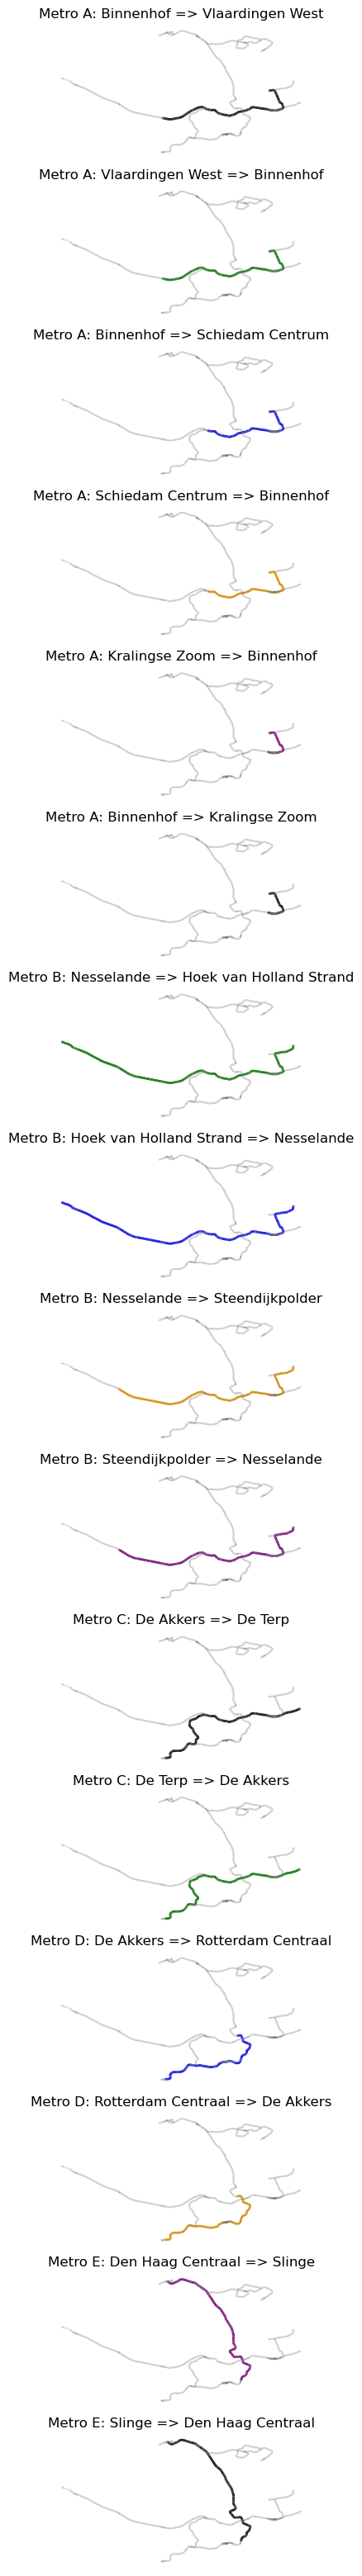

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Rotterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [11]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

## Add columns to nodes

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [17]:
# sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [18]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add0.xlsx',header=True,index=False)

In [19]:
stations_name_ref = sub_order_route_stations_df.copy()
stations_name_ref = stations_name_ref[['name','ref']]
stations_name_ref.to_excel('./stations_name_ref.xlsx',header=True,index=False)

In [20]:
stations_name_ref = stations_name_ref.drop_duplicates()
stations_name_ref

,name,ref
0,Vlaardingen West,A
1,Vlaardingen Centrum,A
2,Vlaardingen Oost,A
3,Schiedam Nieuwland,A
4,Schiedam Centrum,A
...,...,...
216,Forepark,E
217,Leidschendam-Voorburg,E
218,Voorburg 't Loo,E
219,Den Haag Laan van NOI,E


In [21]:
stations_name_ref.reset_index(drop=True,inplace=True)
stations_name_ref = stations_name_ref.groupby('name').agg({'ref': lambda x: ', '.join(x)})
stations_name_ref.reset_index(inplace=True)
stations_name_ref

,name,ref
0,Alexander,"A, B"
1,Ambachtsland,B
2,Berkel Westpolder,E
3,Beurs,"A, B, C, D, E"
4,Binnenhof,A
...,...,...
66,Voorburg 't Loo,E
67,Voorschoterlaan,"A, B, C"
68,Wilhelminaplein,"D, E"
69,Zalmplaat,"C, D"


In [22]:
sub_order_route_stations_df = pd.merge(sub_order_route_stations_df, stations_name_ref, on='name', how='left')
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
239,16,Wilhelminaplein,POINT (4.4925955 51.9077405),4.492596,51.907741,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4925955, 51.9077405)","D, E"
240,19,Rijnhaven,POINT (4.4968239 51.90358),4.496824,51.90358,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4968239, 51.90358)","D, E"
241,2,Maashaven,POINT (4.4947847 51.8971895),4.494785,51.89719,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4947847, 51.8971895)","D, E"
242,18,Zuidplein,POINT (4.4883544 51.8868895),4.488354,51.88689,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4883544, 51.8868895)","D, E"


In [23]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add1.xlsx',header=True,index=False)

In [24]:
sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value').reset_index(drop=True)
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,12,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4608735, 51.9754027)",E
147,8,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4622518, 51.955892)",E
148,20,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4644824, 51.9486955)",E
149,7,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4582602, 51.9306444)",E


In [25]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add2.xlsx',header=True,index=False)

In [26]:
sub_order_route_stations_df = sub_order_route_stations_df[['name','geometry','geo_x','geo_y','coordinate_value','route_name_list','route','ref_y']]
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref_y
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [27]:
sub_order_route_stations_df.rename(columns={'ref_y': 'ref'}, inplace=True)
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [28]:
sub_new_nodes = pd.merge(nodes, sub_order_route_stations_df, on='geometry', how='right')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [29]:
sub_new_nodes['transfer'] = None
def fill_transfer(row):
    if ',' in row['ref']:
        return row['ref']
    else:
        return None

sub_new_nodes['transfer'] = sub_new_nodes.apply(fill_transfer, axis=1)

In [30]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [31]:
# add_transfer_to_new_nodes

In [32]:
sub_new_nodes['transfer'] = sub_new_nodes['ref'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [33]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","(A, B, C)"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [34]:
sub_new_nodes.to_excel('./sub_new_nodes907.xlsx',header = True, index = False)

# Subway-Amsterdan

In [35]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

## Generate subway networks

In [36]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 8548.52it/s]


In [37]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [38]:
nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [39]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [40]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


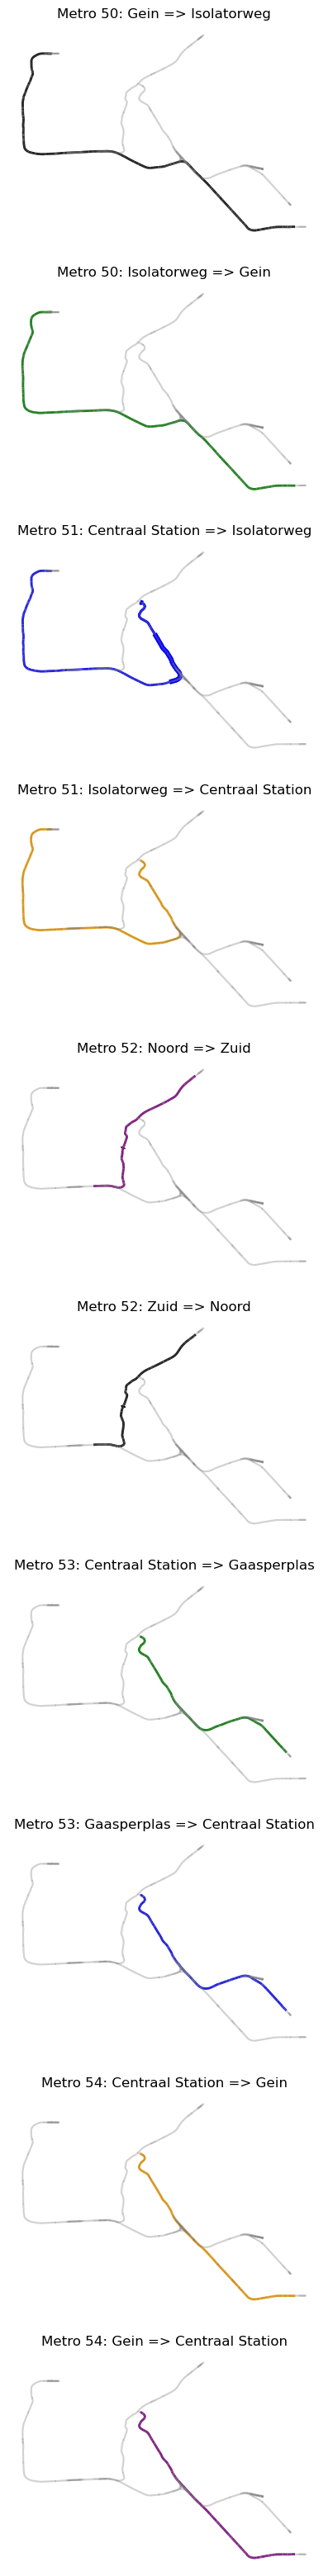

In [41]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [42]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [43]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

## Add columns to nodes

In [44]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [45]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0   21          Isolatorweg  POINT (4.8505958 52.3951031)  4.850596   
 1    0   Station Sloterdijk  POINT (4.8389786 52.3890375)  4.838979   
 2   13         De Vlugtlaan   POINT (4.838233 52.3794484)  4.838233   
 3   14  Jan van Galenstraat  POINT (4.8353639 52.3725816)  4.835364   
 4   15           Postjesweg  POINT (4.8340343 52.3645962)  4.834034   
 5   12             Lelylaan  POINT (4.8344667 52.3580615)  4.834467   
 6    2      Heemstedestraat   POINT (4.834401 52.3523291)  4.834401   
 7   11    Henk Sneevlietweg  POINT (4.8345741 52.3463868)  4.834574   
 8    8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 9   10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 10  19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 11   9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 12   7      Van der Madeweg  P

In [46]:
# sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [47]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add0.xlsx',header=True,index=False)

In [48]:
stations_name_ref = sub_order_route_stations_df.copy()
stations_name_ref = stations_name_ref[['name','ref','route_name_list']]
stations_name_ref.to_excel('./stations_name_ref.xlsx',header=True,index=False)

In [49]:
stations_name_ref = stations_name_ref.drop_duplicates()
stations_name_ref

,name,ref,route_name_list
0,Isolatorweg,50,Metro 50: Gein => Isolatorweg
1,Station Sloterdijk,50,Metro 50: Gein => Isolatorweg
2,De Vlugtlaan,50,Metro 50: Gein => Isolatorweg
3,Jan van Galenstraat,50,Metro 50: Gein => Isolatorweg
4,Postjesweg,50,Metro 50: Gein => Isolatorweg
...,...,...,...
147,Bijlmer ArenA,54,Metro 54: Gein => Centraal Station
148,Bullewijk,54,Metro 54: Gein => Centraal Station
149,Holendrecht,54,Metro 54: Gein => Centraal Station
150,Reigersbos,54,Metro 54: Gein => Centraal Station


In [50]:
stations_name_ref.reset_index(drop=True,inplace=True)
stations_name_ref = stations_name_ref.groupby('name').agg({'ref': lambda x: ', '.join(x),'route_name_list': lambda x: ', '.join(x)})
stations_name_ref.reset_index(inplace=True)
stations_name_ref

,name,ref,route_name_list
0,Amstelstation,"51, 51, 53, 53, 54, 54","Metro 51: Centraal Station => Isolatorweg, Met..."
1,Amstelveenseweg,"50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
2,Bijlmer ArenA,"50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
3,Bullewijk,"50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
4,Centraal Station,"51, 51, 52, 52, 53, 53, 54, 54","Metro 51: Centraal Station => Isolatorweg, Met..."
5,De Pijp,"52, 52","Metro 52: Noord => Zuid, Metro 52: Zuid => Noord"
6,De Vlugtlaan,"50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
7,Duivendrecht,"50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
8,Europaplein,"52, 52","Metro 52: Noord => Zuid, Metro 52: Zuid => Noord"
9,Gaasperplas,"53, 53","Metro 53: Centraal Station => Gaasperplas, Met..."


In [51]:
sub_order_route_stations_df = pd.merge(sub_order_route_stations_df, stations_name_ref, on='name', how='left')
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list_x,ref_x,route,coordinate_value,ref_y,route_name_list_y
0,21,Isolatorweg,POINT (4.8505958 52.3951031),4.850596,52.395103,Metro 50: Gein => Isolatorweg,50,subway,"(4.8505958, 52.3951031)","50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
1,0,Station Sloterdijk,POINT (4.8389786 52.3890375),4.838979,52.389038,Metro 50: Gein => Isolatorweg,50,subway,"(4.8389786, 52.3890375)","50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
2,13,De Vlugtlaan,POINT (4.838233 52.3794484),4.838233,52.379448,Metro 50: Gein => Isolatorweg,50,subway,"(4.838233, 52.3794484)","50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
3,14,Jan van Galenstraat,POINT (4.8353639 52.3725816),4.835364,52.372582,Metro 50: Gein => Isolatorweg,50,subway,"(4.8353639, 52.3725816)","50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
4,15,Postjesweg,POINT (4.8340343 52.3645962),4.834034,52.364596,Metro 50: Gein => Isolatorweg,50,subway,"(4.8340343, 52.3645962)","50, 50, 51, 51","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
...,...,...,...,...,...,...,...,...,...,...,...
147,3,Bijlmer ArenA,POINT (4.9476178 52.311806),4.947618,52.311806,Metro 54: Gein => Centraal Station,54,subway,"(4.9476178, 52.311806)","50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
148,5,Bullewijk,POINT (4.9521292 52.306869),4.952129,52.306869,Metro 54: Gein => Centraal Station,54,subway,"(4.9521292, 52.306869)","50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
149,10,Holendrecht,POINT (4.9601264 52.2981319),4.960126,52.298132,Metro 54: Gein => Centraal Station,54,subway,"(4.9601264, 52.2981319)","50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."
150,11,Reigersbos,POINT (4.9740002 52.2956365),4.974,52.295637,Metro 54: Gein => Centraal Station,54,subway,"(4.9740002, 52.2956365)","50, 50, 54, 54","Metro 50: Gein => Isolatorweg, Metro 50: Isola..."


In [52]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add1.xlsx',header=True,index=False)

In [51]:
sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value').reset_index(drop=True)
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,21,Isolatorweg,POINT (4.8505958 52.3951031),4.850596,52.395103,Metro 50: Gein => Isolatorweg,50,subway,"(4.8505958, 52.3951031)","50, 51"
1,0,Station Sloterdijk,POINT (4.8389786 52.3890375),4.838979,52.389038,Metro 50: Gein => Isolatorweg,50,subway,"(4.8389786, 52.3890375)","50, 51"
2,13,De Vlugtlaan,POINT (4.838233 52.3794484),4.838233,52.379448,Metro 50: Gein => Isolatorweg,50,subway,"(4.838233, 52.3794484)","50, 51"
3,14,Jan van Galenstraat,POINT (4.8353639 52.3725816),4.835364,52.372582,Metro 50: Gein => Isolatorweg,50,subway,"(4.8353639, 52.3725816)","50, 51"
4,15,Postjesweg,POINT (4.8340343 52.3645962),4.834034,52.364596,Metro 50: Gein => Isolatorweg,50,subway,"(4.8340343, 52.3645962)","50, 51"
...,...,...,...,...,...,...,...,...,...,...
81,6,Station Diemen Zuid,POINT (4.9566878 52.3304057),4.956688,52.330406,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9566878, 52.3304057)",53
82,7,Verrijn Stuartweg,POINT (4.9673352 52.3283668),4.967335,52.328367,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9673352, 52.3283668)",53
83,2,Ganzenhoef,POINT (4.9730859 52.3237237),4.973086,52.323724,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9730859, 52.3237237)",53
84,5,Kraaiennest,POINT (4.9791866 52.3170385),4.979187,52.317039,Metro 53: Gaasperplas => Centraal Station,53,subway,"(4.9791866, 52.3170385)",53


In [52]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add2.xlsx',header=True,index=False)

In [53]:
sub_order_route_stations_df = sub_order_route_stations_df[['name','geometry','geo_x','geo_y','coordinate_value','route_name_list','route','ref_y']]
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref_y
0,Isolatorweg,POINT (4.8505958 52.3951031),4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
1,Station Sloterdijk,POINT (4.8389786 52.3890375),4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
2,De Vlugtlaan,POINT (4.838233 52.3794484),4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
3,Jan van Galenstraat,POINT (4.8353639 52.3725816),4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
4,Postjesweg,POINT (4.8340343 52.3645962),4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
...,...,...,...,...,...,...,...,...
81,Station Diemen Zuid,POINT (4.9566878 52.3304057),4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53
82,Verrijn Stuartweg,POINT (4.9673352 52.3283668),4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53
83,Ganzenhoef,POINT (4.9730859 52.3237237),4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53
84,Kraaiennest,POINT (4.9791866 52.3170385),4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53


In [54]:
sub_order_route_stations_df.rename(columns={'ref_y': 'ref'}, inplace=True)
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,Isolatorweg,POINT (4.8505958 52.3951031),4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
1,Station Sloterdijk,POINT (4.8389786 52.3890375),4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
2,De Vlugtlaan,POINT (4.838233 52.3794484),4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
3,Jan van Galenstraat,POINT (4.8353639 52.3725816),4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
4,Postjesweg,POINT (4.8340343 52.3645962),4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
...,...,...,...,...,...,...,...,...
81,Station Diemen Zuid,POINT (4.9566878 52.3304057),4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53
82,Verrijn Stuartweg,POINT (4.9673352 52.3283668),4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53
83,Ganzenhoef,POINT (4.9730859 52.3237237),4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53
84,Kraaiennest,POINT (4.9791866 52.3170385),4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53


In [55]:
sub_new_nodes = pd.merge(nodes, sub_order_route_stations_df, on='geometry', how='right')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53
83,POINT (4.97309 52.32372),2,301,Ganzenhoef,4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53
84,POINT (4.97919 52.31704),2,821,Kraaiennest,4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53


In [56]:
# add_transfer_to_new_nodes

In [57]:
sub_new_nodes['transfer'] = None
def fill_transfer(row):
    if ',' in row['ref']:
        return row['ref']
    else:
        return None

sub_new_nodes['transfer'] = sub_new_nodes.apply(fill_transfer, axis=1)

In [58]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
...,...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.97309 52.32372),2,301,Ganzenhoef,4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.97919 52.31704),2,821,Kraaiennest,4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53,None


In [59]:
type(sub_new_nodes.iloc[0][10])

str

In [60]:
sub_new_nodes.to_excel('./sub_new_nodes907am.xlsx',header = True, index = False)

In [59]:
sub_new_nodes['transfer'] = sub_new_nodes['ref'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [60]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51","(5, 0, 5, 1)"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51","(5, 0, 5, 1)"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51","(5, 0, 5, 1)"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51","(5, 0, 5, 1)"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51","(5, 0, 5, 1)"
...,...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,"(5, 3)"
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,"(5, 3)"
83,POINT (4.97309 52.32372),2,301,Ganzenhoef,4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53,"(5, 3)"
84,POINT (4.97919 52.31704),2,821,Kraaiennest,4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53,"(5, 3)"


In [64]:
sub_new_nodes.iloc[0][9]

'50, 51'

In [63]:
type(sub_new_nodes.iloc[0][9])

str